In [1]:
import ScatterPlotToolbox as toolbox
import numpy
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
PATH_1947L: str = '/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/Vervet1947L_sagittal_s0374_rv/Scattering-Stack_s0139.nii'
PATH_OPTIC: str = '/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/Stack_s0125.nii'
PATH_VER: str = '/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/90_Stack.tif'
PATH_RAT: str = '/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/78_Stack.tif'
PATH_OPTIC_NEW = '/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/158_OpticChiasm_s0036_kk_rv_crop.nii'
ROISIZE: int = 3

In [14]:
def full_pipeline(PATH, NAME, ROISIZE):
    image = toolbox.read_image(PATH)
    path_name = NAME
    roiset = toolbox.zaxis_roiset(image, ROISIZE)
    print("Roi finished")
    #max_array = toolbox.max_array_from_roiset(roiset)
    #max_image = toolbox.reshape_array_to_image(max_array, image.shape[0], ROISIZE)
    #Image.fromarray(max_image).resize(image.shape[:2][::-1]).save(path_name+'_max.tiff')
    #print("Max image written")
    #min_array = toolbox.min_array_from_roiset(roiset)
    #min_image = toolbox.reshape_array_to_image(min_array, image.shape[0], ROISIZE)
    #Image.fromarray(min_image).resize(image.shape[:2][::-1]).save(path_name+'_min.tiff')
    #print("Min image written")
    peak_array = toolbox.peak_array_from_roiset(roiset)
    peak_image = toolbox.reshape_array_to_image(peak_array, image.shape[0], ROISIZE)
    Image.fromarray(peak_image).resize(image.shape[:2][::-1]).save(path_name+'_peaks.tiff')
    print("Peak image written")
    #direction_array = toolbox.non_crossing_direction_array_from_roiset(roiset)
    #direction_image = toolbox.reshape_array_to_image(direction_array, image.shape[0], ROISIZE)
    #Image.fromarray(direction_image).resize(image.shape[:2][::-1]).save(path_name+'_non_crossing_dir.tiff')
    #print("Non Crossing Direction written")
    crossing_array = numpy.where(peak_array > 2, 255, 0).astype('uint8')
    crossing_image = toolbox.reshape_array_to_image(crossing_array, image.shape[0], ROISIZE)
    Image.fromarray(crossing_image).resize(image.shape[:2][::-1]).save(path_name+'_crossing.tiff')
    print("4 Peak written")
    #direction_array = toolbox.crossing_direction_array_from_roiset(roiset)
    #dir_1 = toolbox.reshape_array_to_image(direction_array[:, 0], image.shape[0], ROISIZE)
    #dir_2 = toolbox.reshape_array_to_image(direction_array[:, 1], image.shape[0], ROISIZE)
    #Image.fromarray(dir_1).resize(image.shape[:2][::-1]).save(path_name+'_dir_1.tiff')
    #Image.fromarray(dir_2).resize(image.shape[:2][::-1]).save(path_name+'_dir_2.tiff')
    #print("Crossing Directions written")

In [15]:
paths = [PATH_1947L, PATH_OPTIC, PATH_VER, PATH_RAT, PATH_OPTIC_NEW]
names = ['Scattering-Stack_s0139', 'Stack_s0125', '90_Stack', '78_Stack', '158_OpticChiasm_s0036_kk_rv_crop']

for path, name in zip(paths, names):
    print(path, name)
    full_pipeline(path, name, ROISIZE)

/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/Vervet1947L_sagittal_s0374_rv/Scattering-Stack_s0139.nii Scattering-Stack_s0139
Roi finished
Peak image written
4 Peak written
/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/Stack_s0125.nii Stack_s0125
Roi finished
Peak image written
4 Peak written
/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/90_Stack.tif 90_Stack
Roi finished
Peak image written
4 Peak written
/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/78_Stack.tif 78_Stack
Roi finished
Peak image written
4 Peak written
/home/homeGlobal/jreuter/Studium/MasterStudium/MasterArbeit/Dateien/158_OpticChiasm_s0036_kk_rv_crop.nii 158_OpticChiasm_s0036_kk_rv_crop
Roi finished
Peak image written
4 Peak written


In [ ]:
image = toolbox.read_image(PATH)
roiset = toolbox.zaxis_roiset(image, ROISIZE)

In [ ]:
max_array = toolbox.max_array_from_roiset(roiset)
max_image = toolbox.reshape_array_to_image(max_array, image.shape[0], ROISIZE)
Image.fromarray(max_image).resize(image.shape[:2][::-1]).save(path_name+'_max.tiff')

In [ ]:
min_array = toolbox.min_array_from_roiset(roiset)
min_image = toolbox.reshape_array_to_image(min_array, image.shape[0], ROISIZE)
Image.fromarray(min_image).resize(image.shape[:2][::-1]).save(path_name+'_min.tiff')

In [15]:
peak_array = toolbox.peak_array_from_roiset(roiset)
peak_image = toolbox.reshape_array_to_image(peak_array, image.shape[0], ROISIZE)
Image.fromarray(peak_image).resize(image.shape[:2][::-1]).save(path_name+'_peaks.tiff')

KeyboardInterrupt: 

In [ ]:
direction_array = toolbox.non_crossing_direction_array_from_roiset(roiset)
direction_image = toolbox.reshape_array_to_image(direction_array, image.shape[0], ROISIZE)
Image.fromarray(direction_image).resize(image.shape[:2][::-1]).save(path_name+'_non_crossing_dir.tiff')

In [ ]:
crossing_array = numpy.where(peak_array == 4, 255, 0).astype('uint8')
crossing_image = toolbox.reshape_array_to_image(crossing_array, image.shape[0], ROISIZE)
Image.fromarray(crossing_image).resize(image.shape[:2][::-1]).save(path_name+'_crossing.tiff')

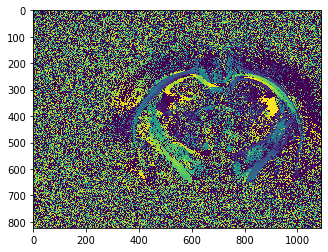

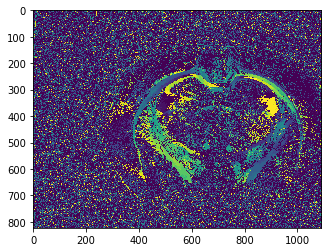

In [5]:
direction_array = toolbox.crossing_direction_array_from_roiset(roiset)
dir_1 = toolbox.reshape_array_to_image(direction_array[:, 0], image.shape[0], ROISIZE)
dir_2 = toolbox.reshape_array_to_image(direction_array[:, 1], image.shape[0], ROISIZE)
Image.fromarray(dir_1).resize(image.shape[:2][::-1]).save(path_name+'_dir_1.tiff')
Image.fromarray(dir_2).resize(image.shape[:2][::-1]).save(path_name+'_dir_2.tiff')